In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\abhijit.a.pande\\Machine Learning\\Py_DS_ML_BC\\14-K-Nearest-Neighbors\\KNN_Project_Data.csv")

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
df_upd = pd.DataFrame(scaler.transform(df.drop('TARGET CLASS', axis = 1)), columns = df.columns[:-1])

In [11]:
y = df['TARGET CLASS']

In [12]:
df_upd.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [19]:
x_train, x_test, y_train, y_test = train_test_split(df_upd, y, test_size = 0.4, random_state = 101)

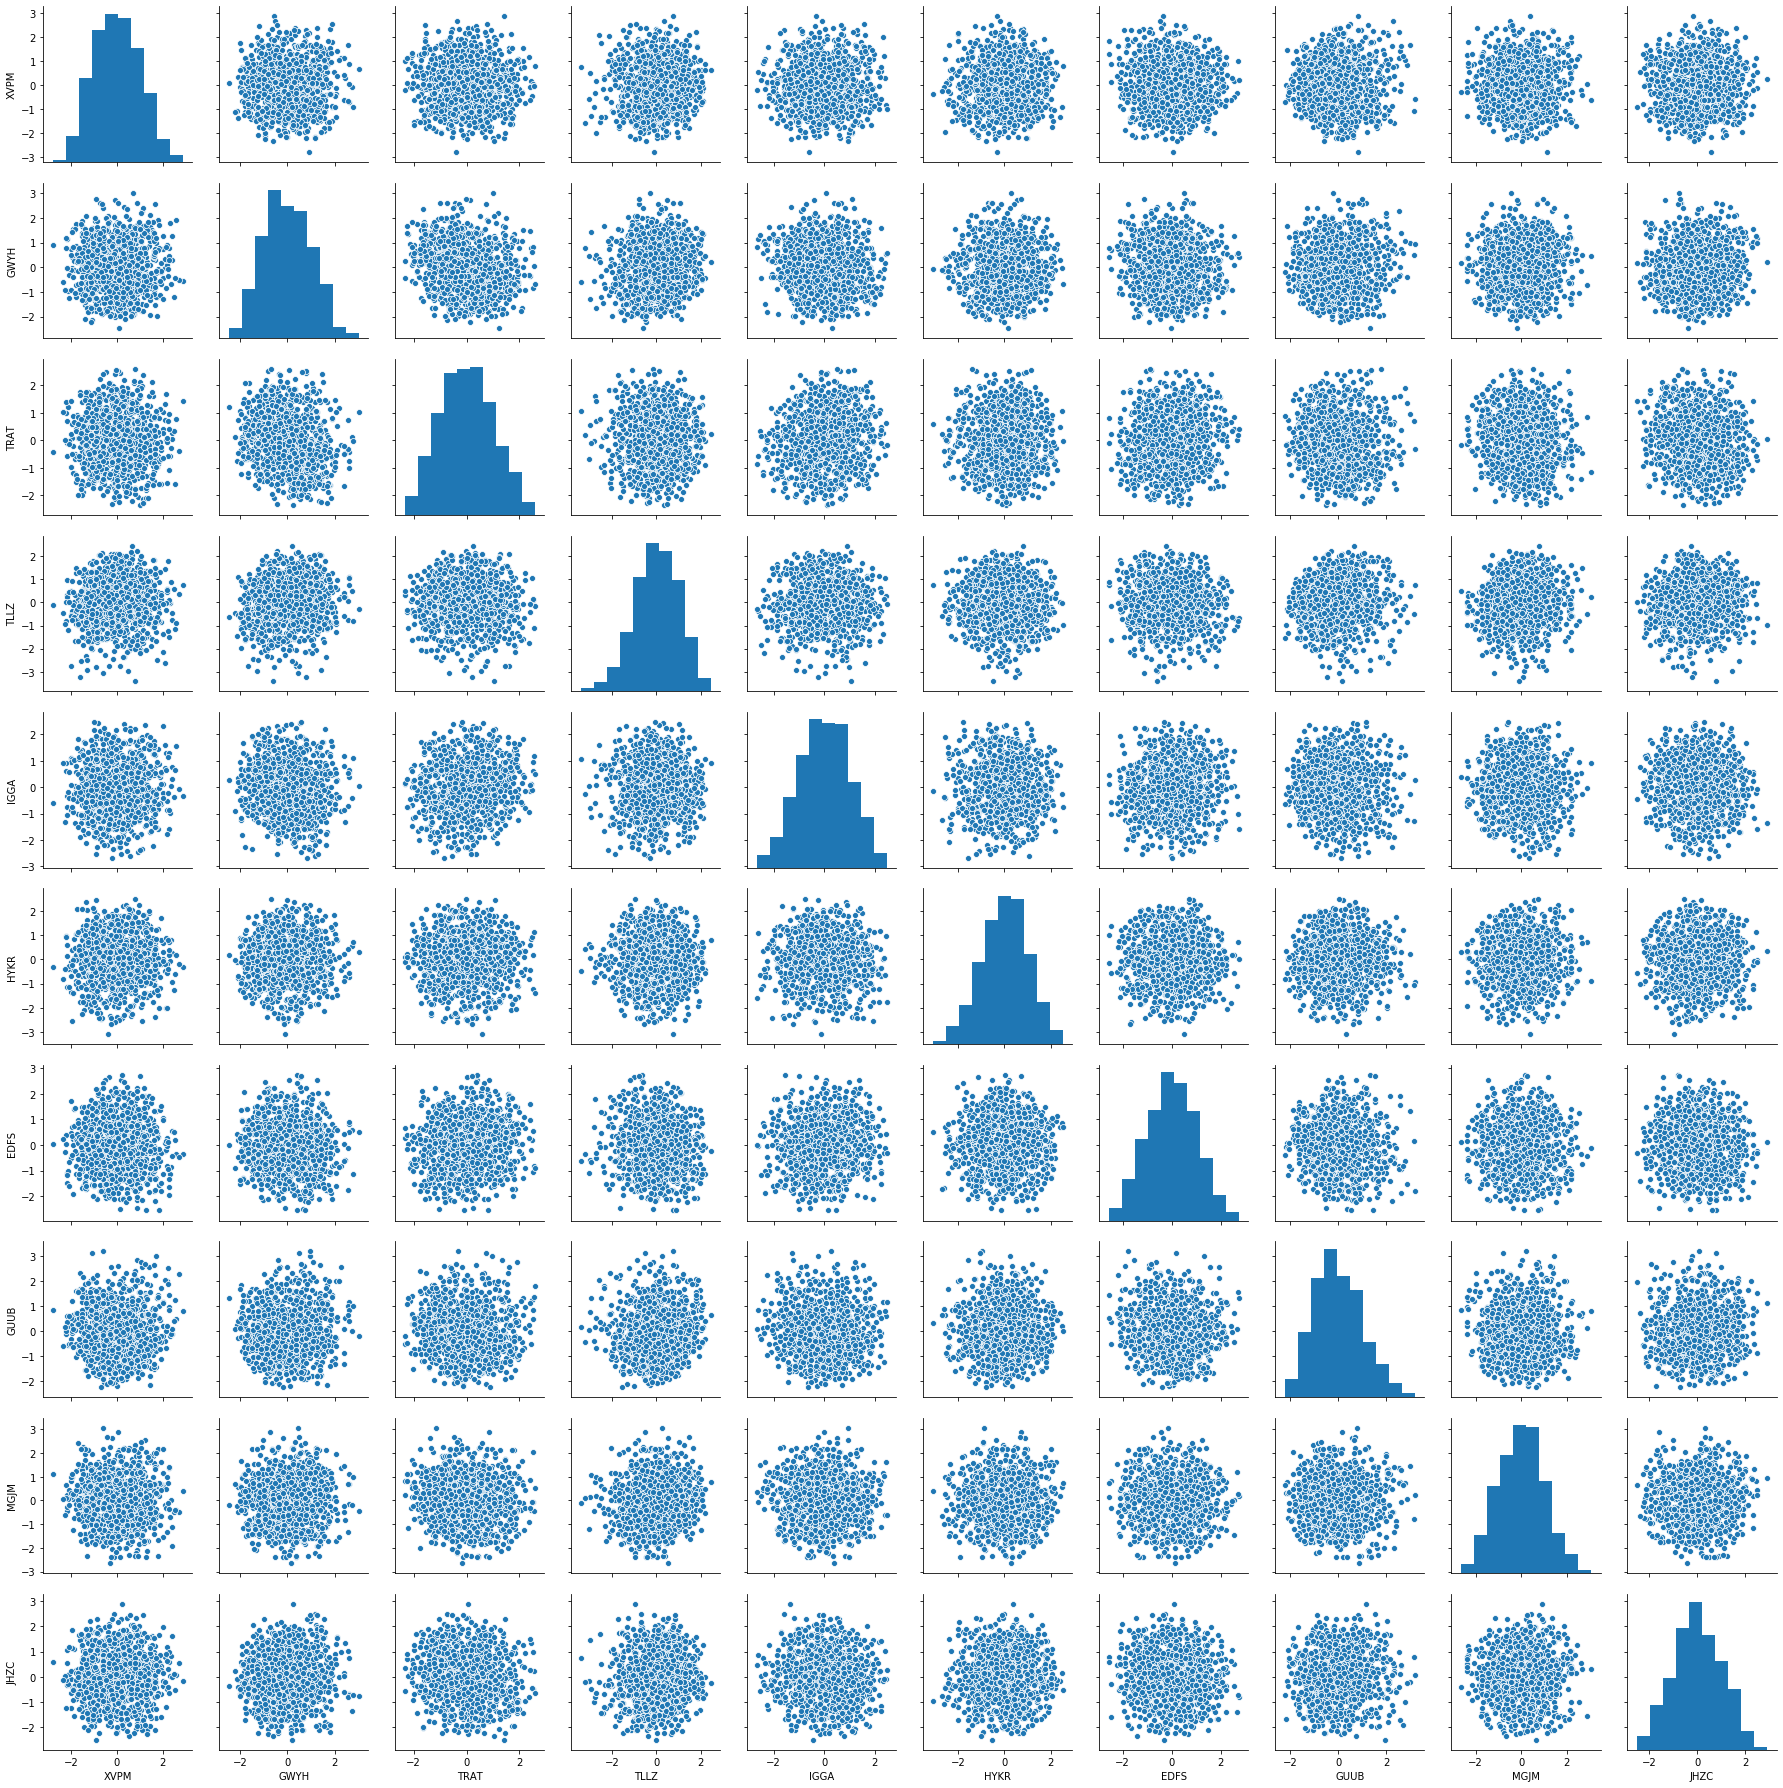

In [20]:
sb.pairplot(df_upd)

In [23]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [24]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [25]:
predictions = knn.predict(x_test)

In [26]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71       199
           1       0.71      0.72      0.71       201

    accuracy                           0.71       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.71      0.71       400



In [27]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [28]:
error_rate

[0.2875,
 0.2975,
 0.225,
 0.235,
 0.2,
 0.21,
 0.175,
 0.175,
 0.1825,
 0.18,
 0.19,
 0.185,
 0.1775,
 0.175,
 0.1825,
 0.18,
 0.1725,
 0.1825,
 0.1825,
 0.1925,
 0.18,
 0.1825,
 0.185,
 0.1725,
 0.17,
 0.175,
 0.1725,
 0.1675,
 0.1725,
 0.17,
 0.1725,
 0.175,
 0.175,
 0.1725,
 0.17,
 0.17,
 0.17,
 0.17,
 0.175]

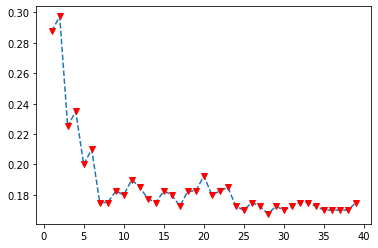

In [39]:
plt.xlabel = "K"
plt.ylabel = "Error Rate"
plt.plot(range(1,40),error_rate, marker = 'v',
         linestyle = "dashed", markerfacecolor = "red",
         markeredgecolor = "red")

In [40]:
knn = KNeighborsClassifier(n_neighbors=30)

In [41]:
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [43]:
predictions = knn.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       199
           1       0.82      0.84      0.83       201

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

